<a href="https://colab.research.google.com/github/marcellamj/soulcode-martech/blob/main/AD2_Banco_de_Dados_Relacionais_e_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de SQL**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech AD2

Professor: Franciane Rodrigues/Douglas Ribeiro

Aulas: 20,21

## **Criando um banco de dados MySQL 8.0 na GCP**

*  **Acesse a GCP**: Cloud SQL

*  **Ative a API**: caso necessário

*  **Criar instância**

*  **Card MySQL 8.0**

*  **ID da instância**: nome

*  **Senha:** nenhuma senha

*  **Configuração:**:máquina de desenvolvimento

*  **Personalize sua instância**: mais opções

*  **Proteção de dados**: Desativar proteção contra exclusão

*  **Criar instância**

## **Cloud Shell**

### **Criação do Banco de Dados**

* Comandos de criação do banco de dados, das tabelas (entidades) e colunas (atributos).



1.   Acessar banco de dados criado na instância
2.   Mostrar os bancos instalados na máquina
3.   Criar bancos de dados: escola
4.   Entrar no banco de dados que deseja usar
5.   Mostrar as tabelas no banco de dados
6.   Criar entidade: alunos
    *   id int not null auto_increment
    *   not null - obrigatório preencher
    *   varchar (30) - limite de caracteres
    *   varchar default 'nome' - caso vazio, preenche automaticamente
    *   date
    *   decimal (3,2) - limite,casas decimais
    *   primary key (id) - conexão com outras entidades
7.   Adicionar valores a alunos - string da linha inteira com todas os atributos
8.   Consultar se alunos foram incluídos na tabela





**SHOW DATABASES**

**USE database**

**SHOW TABLES**

**CREATE TABLE nome**

**INSERT INTO nome**

**SELECT * FROM nome**

In [ ]:
'''
1. gcloud sql connect (nome_da_instancia) --user=root
ENTER
2. mysql> SHOW DATABASES
3. CREATE DATABASE escola;
4. USE escola;
5. SHOW TABLES;
6. CREATE TABLE alunos (
    id int not null auto_increment,
    nome varchar (30) not null,
    nascimento date,
    genero varchar (30),
    peso decimal (5,2),
    altura decimal (3,2),
    nacionalidade varchar (20),
    primary key (id)
);

7. INSERT INTO alunos
   (nome, nascimento, genero, peso, altura, nacionalidade)
   values
   ('Douglas','1976-07-04','M','77.5','1.85','Brasil'),
   ('Maria','1990-07-04','F','70.5','1.75','Espanha');
8. SELECT * FROM alunos;

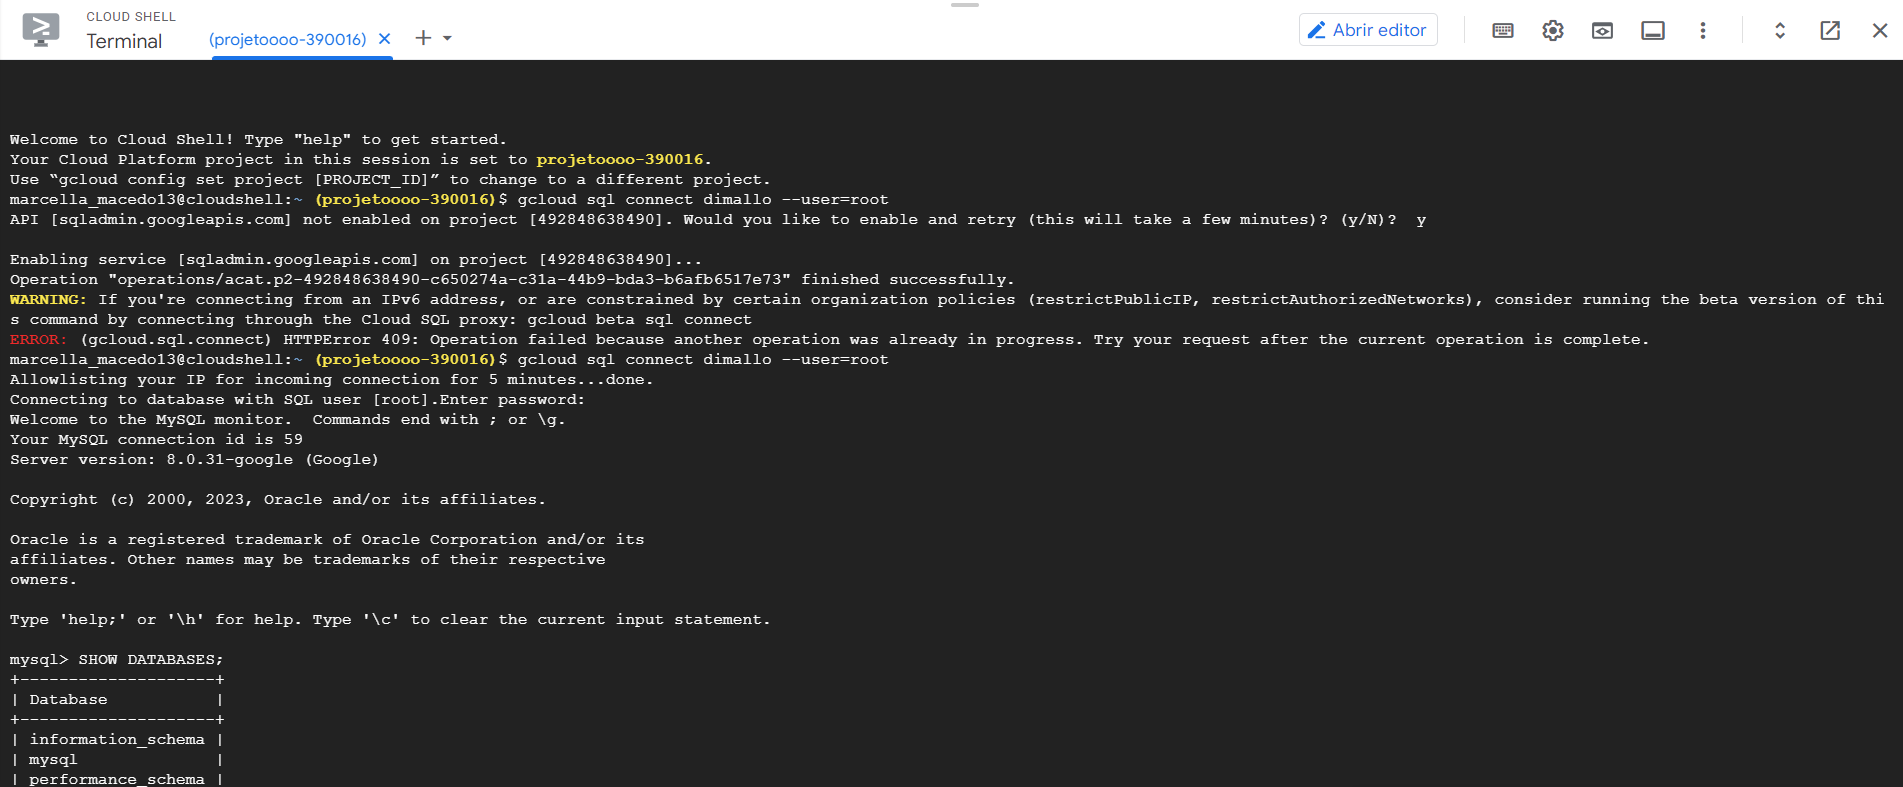

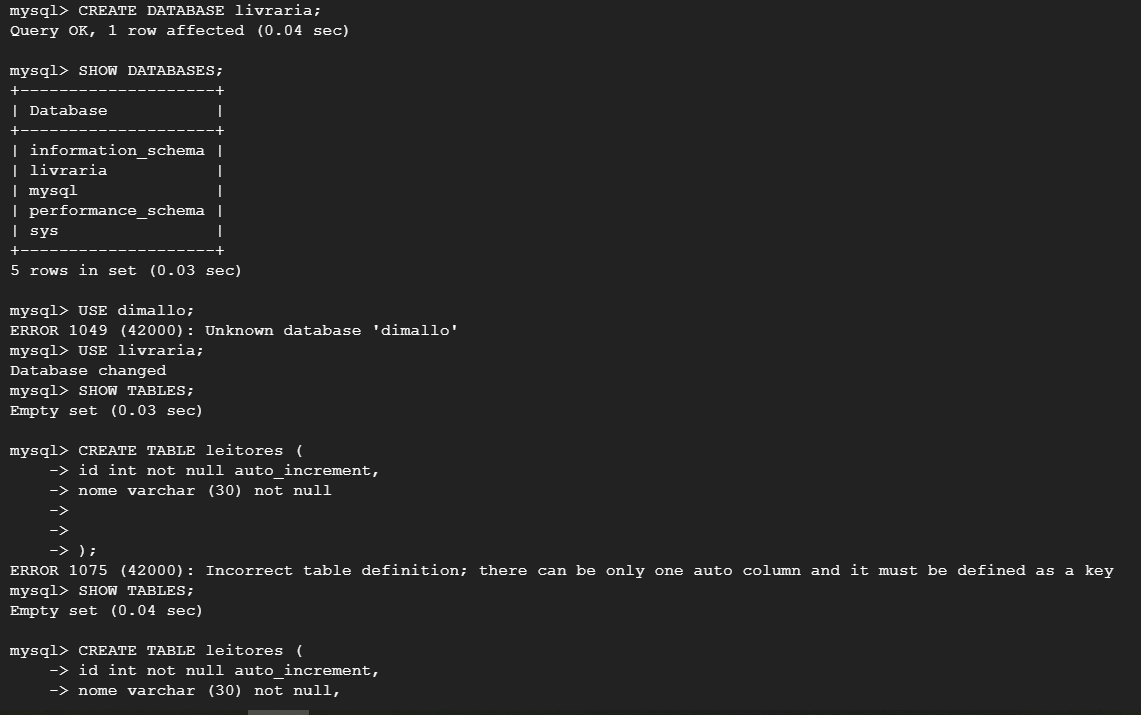

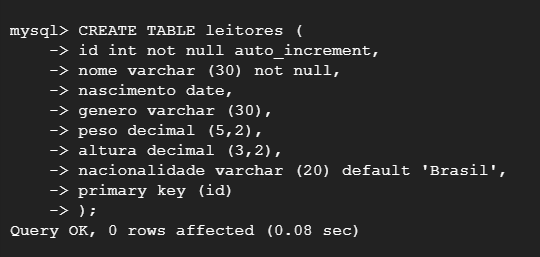

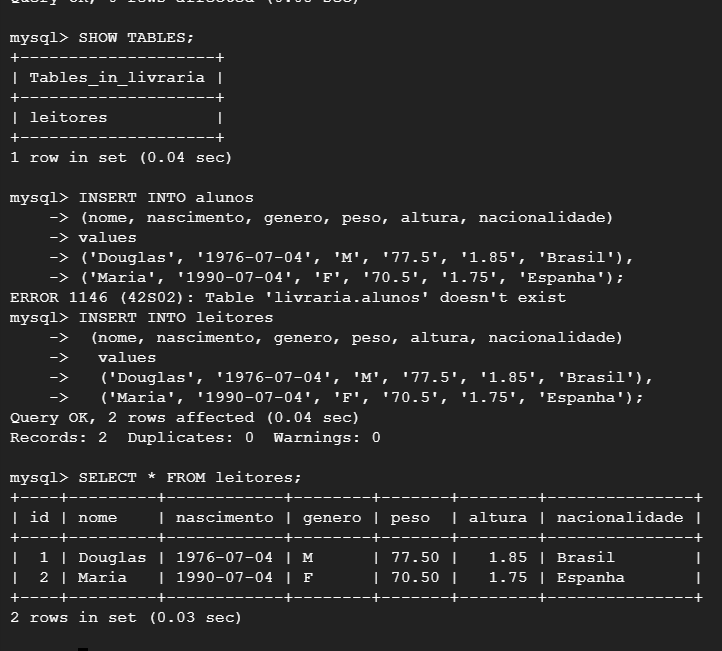

### **Manipulação de Tabelas**

**Criar registros**

 * **INSERT INTO tabela**

In [ ]:
'''
-> Criando registros de alunos na tabela alunos

INSERT INTO alunos
  (nome, nascimento, genero, peso, altura, nacionalidade)
  values
  ('Fulano','1955-04-13','M','96.6','1.75','Brasil'),
  ('Ciclano','1980-04-13','M','92.6','1.83','Brasil'),
  ('Beltrano','1985-04-13','F','65.6','1.70','Brasil'),
  ('Zé','2015-04-13','F','29.6','1.32','Brasil'),
  ('Ninguém','1986-04-13','F','72.6','1.75','Inglaterra');

-> Verificando se foram incluídos

SELECT * FROM alunos;
'''

**Alterar registros**

**ALTER TABLE nome**:
* **ADD COLUMN nome**
* **ADD COLUMN nome AFTER**
* **ADD COLUMN nome FIRST**

In [ ]:
'''
-> Alterando registros de tabelas de um banco de dados:
Adicionando um novo atributo profissão na tabela alunos:

ALTER TABLE alunos
ADD COLUMN profissao varchar (10);

-> Mudar posição do atributo profissao logo após nome:

ALTER TABLE alunos
ADD COLUMN profissao varchar (10) AFTER nome;
--> deu erro porque ja existe coluna profissão
-->é mais fácil trocar o nome dela e adicionar profissão na posição desejada.

-> Adicionar profissão logo após nome:

ALTER TABLE alunos
ADD COLUMN prof varchar (10) AFTER nome;

-> Ou adicionar a coluna antes de todas as outras:

ALTER TABLE alunos
ADD COLUMN profi varchar (10) FIRST;
'''



*   Eliminar registros, renomear, modificar

**ALTER TABLE nome**:
* **DROP COLUMN nome**
* **RENAME COLUMN nome TO nome_novo**
* **MODIFY COLUMN nome**
* **RENAME TO nome** - renomeia a tabela



In [ ]:
'''
-> Eliminando colunas (profi e profissao)
Ficaremos apenas com a coluna prof

ALTER TABLE alunos
DROP COLUMN profissao;

ALTER TABLE alunos
DROP COLUMN profi;

-> Renomear a coluna prof para profissao

ALTER TABLE alunos
RENAME COLUMN prof to profissao;

ALTER TABLE alunos
MODIFY COLUMN genero varchar (10) AFTER profissao

-> Mudar nome da tabela alunos para clientes

ALTER TABLE alunos
RENAME TO clientes;

UPDATE alunos SET prof='WHERE' prof is NULL;
ALTER TABLE alunos
MODIFY COLUMN prof profissao varchar (20) NOT NULL DEFAULT";
'''



**Criar tabela checando se já existe alguma**

**CREATE TABLE IF NOT EXISTS nome**



In [ ]:
'''
Criar nova tabela clientes
CREATE TABLE if not exists clientes (
  nome varchar (30) NOT NULL,
  descricao text,
  idade int,
  nasc date
);

não gera erro porém não cria tabela.
'''

**Criar tabela cursos**

In [ ]:
'''
CREATE TABLE if not exists cursos (
  area varchar (30) NOT NULL,
  curso text,
  descricao text,  --> ADICIONEI ERRADO
  carga int,
  abertura date
);

SHOW TABLES;
SELECT * FROM cursos;
'''
'''
Incluir coluna idcurso na primeira posição:

ALTER TABLE cursos
ADD COLUMN idcurso int FIRST;
'''

**Transformar idcurso em chave primária:**

In [ ]:
'''
ALTER TABLE cursos
ADD PRIMARY KEY (idcurso);
'''


**Popular tabela cursos**

In [ ]:
'''
As colunas dos valores abaixo são: area, curso, carga, vagas, abertura

INSERT INTO cursos
values
 ('1','Humanas','Latras','3000','80','2014-01-01'),
 ('2','Bio','Medicina','5000','40','2014-01-01'),
 ('3','Exatas','Engenharia','4000','50','2014-01-01'),
 ('4','Exatas','ADSS','3500','40','2010-01-01'),
 ('5','Exatas','Mat','3000','40','2000-01-01'),
 ('6','Bio','enfermagem','3000','40','2016-01-01'),
 ('7','Humanas','Filosofia','4000','30','2016-01-01'),
 ('8','Humanas','Geografia','4000','30','2018-01-01'),
 ('9','Exatas','Bancos de Dados','3000','30','2018-01-01'),
 ('10','Bio','Fisioterapis','4000','30','2018-01-01');

 ALTER TABLE cursos
 RENAME COLUMN carga to vagas;

 ALTER TABLE cursos
 RENAME COLUMN descricao to carga;

'''

**Modificar tuplas linha por linha**

* **UPDATE/SET/WHERE**

* **DELETE FROM**

* **LIMIT 1**

In [ ]:
'''
-> Corrigir onde está Latras para Letras

UPDATE cursos
SET curso = 'Letras'
WHERE idcurso = '1';

-> Corrigir onde está Fisioterapis para Fisioterapia

UPDATE cursos
SET curso = 'Fisioterapia'
WHERE idcurso = '10';

-> Corrigir onde está ADSS para ADS

UPDATE cursos
SET curso = 'ADS'
WHERE idcurso = '4';

-> Corrigir onde está enfermagem para Enfermagem e mudar vagas para 100

UPDATE cursos
SET curso = 'Enfermagem', vagas = '100'
WHERE idcurso = '6';

-> Deletar o curso de banco de dados

DELETE from cursos
WHERE idcurso = '9';

-> Deletar todos os cursos que tenham 30 vagas

DELETE FROM cursos
WHERE vagas = '30';

-> Agora vamos deletar o primeiro curso que apareça na tabela com abertura = 2014-01-01

DELETE FROM cursos
WHERE abertura = '2014-01-01'
LIMIT 1;
'''

**Excluir todos os registros ou tuplas,
mas manter a tabela no banco de dados (na prática elimina os dados da tabela):**

* **TRUNCATE TABLE**


In [ ]:
# TRUNCATE TABLE cursos;

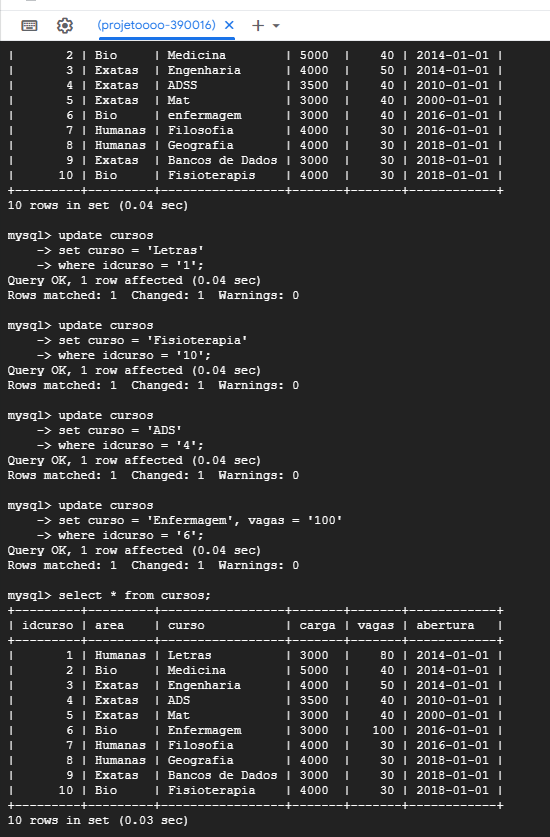

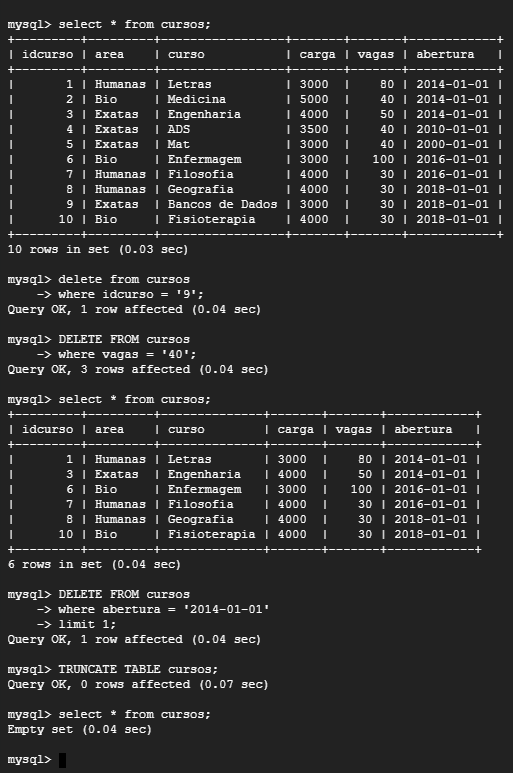

# Nova seção